# Introduction to Artificial Neural Networks

**Goal** : This notebook explains the building blocks of a neural network model. 

**Data** : Data is taken from `sklearn`'s `make_moon` dataset. There are two features and and the target is a categorical variable (0/1). The aim is to devise an algorithm that correctly classifies the datapoints. 

**Aproach**: We will build the neural networks from first principles. We will create a very simple model and understand how it works. We will also be implementing backpropagation algorithm. Please note that this code is not optimized. This is for instructive purpose - for us to understand how ANN works. Libraries like `theano` have highly optimized code.

(*This notebook is inspired from [this](https://github.com/dennybritz/nn-from-scratch) brilliant notebook*)

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string

random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
#read the datasets

train = pd.read_csv("../data/intro_to_ann.csv")

In [3]:
X, y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])

In [4]:
X

array([[  2.06778839e+00,   2.58133225e-01],
       [  9.93994008e-01,  -6.09144512e-01],
       [ -6.90315436e-01,   7.49920622e-01],
       [  1.02358238e+00,   5.29003080e-01],
       [  7.00747058e-01,  -4.96724018e-01],
       [  9.55062941e-01,   3.71061016e-01],
       [ -5.10234660e-02,   9.78688300e-03],
       [  2.11166892e+00,   2.91466670e-01],
       [  1.17301939e+00,  -1.01473076e-01],
       [ -5.77947070e-01,   1.27730309e+00],
       [  9.09597624e-01,   3.63086720e-02],
       [  2.07773424e+00,   6.29147857e-01],
       [ -9.62290964e-01,   8.27233623e-01],
       [  9.47003591e-01,  -2.90186106e-01],
       [  3.83209976e-01,  -3.09917567e-01],
       [ -1.50287574e-01,   3.17294355e-01],
       [  8.03611230e-02,   5.02094351e-01],
       [  1.20012519e+00,  -5.27865179e-01],
       [ -9.22386507e-01,   4.65574823e-01],
       [  5.12394856e-01,  -3.34921280e-02],
       [  6.60176708e-01,   3.54198518e-01],
       [  9.19878779e-01,  -5.93771970e-01],
       [  

In [5]:
y

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1,

In [6]:
print X.shape, y.shape

(500, 2) (500,)


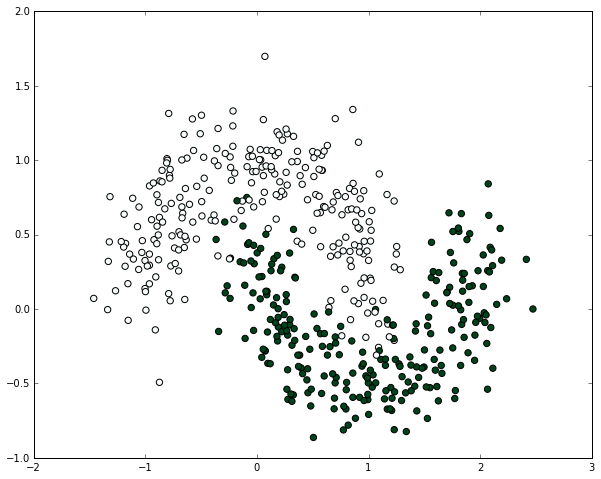

In [7]:
#Let's plot the dataset and see how it is
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

## Let's start building our neural network's building blocks. 

This process will eventually result in our own Neural Networks class

### Function to generate a random number, given two numbers

**Where will it be used?**: When we initialize the neural networks, the weights have to be randomly assigned. Remember?

In [8]:
# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a

In [9]:
# Make a matrix 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

### Define our activation function. Let's use sigmoid function

In [10]:
# our sigmoid function
def sigmoid(x):
    #return math.tanh(x)
    return 1/(1+np.exp(-x))

### Derivative of our activation function. We need this when we run the backpropagation algorithm

In [11]:
# derivative of our sigmoid function, in terms of the output (i.e. y)
def dsigmoid(y):
    return 1.0 - y**2

### Our neural networks class

When we first create a neural networks architecture, we need to know the number of inputs, number of hidden layers and number of outputs.

The weights have to be randomly initialized.

In [12]:
class NN:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)

### Function for Backpropagation Algorithm

After the forward-pass, we need to compute the error for the output. The error is backpropagated to the layers before it. The weights are adjusted, based on how much they contributed to the prediction error. 

In [13]:
def backPropagate(self, targets, N, M):
        
    if len(targets) != self.no:
        print targets
        raise ValueError('wrong number of target values')

    # calculate error terms for output
    #output_deltas = [0.0] * self.no
    output_deltas = np.zeros(self.no)
    for k in range(self.no):
        error = targets[k]-self.ao[k]
        output_deltas[k] = dsigmoid(self.ao[k]) * error

    # calculate error terms for hidden
        
    #hidden_deltas = [0.0] * self.nh
    hidden_deltas = np.zeros(self.nh)
    for j in range(self.nh):
        error = 0.0
        for k in range(self.no):
            error = error + output_deltas[k]*self.wo[j][k]
        hidden_deltas[j] = dsigmoid(self.ah[j]) * error

    # update output weights
    for j in range(self.nh):
        for k in range(self.no):
            change = output_deltas[k]*self.ah[j]
            self.wo[j][k] = self.wo[j][k] + N*change + M*self.co[j][k]
            self.co[j][k] = change
            #print N*change, M*self.co[j][k]

    # update input weights
    for i in range(self.ni):
        for j in range(self.nh):
            change = hidden_deltas[j]*self.ai[i]
            self.wi[i][j] = self.wi[i][j] + N*change + M*self.ci[i][j]
            self.ci[i][j] = change

    # calculate error
    error = 0.0
    for k in range(len(targets)):
        error = error + 0.5*(targets[k]-self.ao[k])**2
    return error

## Now, the full Neural Networks class

In [14]:
class NN:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
        

    def backPropagate(self, targets, N, M):
        
        if len(targets) != self.no:
            print targets
            raise ValueError('wrong number of target values')

        # calculate error terms for output
        #output_deltas = [0.0] * self.no
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        
        #hidden_deltas = [0.0] * self.nh
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error = error + output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # update output weights
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k]*self.ah[j]
                self.wo[j][k] = self.wo[j][k] + N*change + M*self.co[j][k]
                self.co[j][k] = change
                #print N*change, M*self.co[j][k]

        # update input weights
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] = self.wi[i][j] + N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            #self.predict[i] = self.activate(p[0])

    def weights(self):
        print('Input weights:')
        for i in range(self.ni):
            print(self.wi[i])
        
        print('Output weights:')
        for j in range(self.nh):
            print(self.wo[j])
            
    def activate(self, inputs):
        
        if len(inputs) != self.ni-1:
            print inputs
            raise ValueError('wrong number of inputs')

        # input activations
        for i in range(self.ni-1):
            #self.ai[i] = sigmoid(inputs[i])
            self.ai[i] = inputs[i]
            
        

        # hidden activations
        for j in range(self.nh):
            sum = 0.0
            for i in range(self.ni):
                sum = sum + self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum)
           
        # output activations
        for k in range(self.no):
            sum = 0.0
            for j in range(self.nh):
                sum = sum + self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum)

        
        return self.ao[:]
    

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: learning rate
        # M: momentum factor
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                #print inputs
                #print targets
                self.activate(inputs)
                error = error + self.backPropagate([targets], N, M)
            if i % 5 == 0:
                print('error in interation %d : %-.5f' % (i,error))
        print('Final training error: %-.5f' % error)

### Running the model on our dataset

In [15]:
# create a network with two inputs, one hidden, and one output nodes

n = NN(2, 1, 1)

%timeit -n 1 -r 1 n.train(zip(X,y), iterations=2)

error in interation 0 : 49.37010
Final training error: 48.82462
1 loops, best of 1: 51.1 ms per loop


### Predicting on training dataset and measuring in-sample accuracy

In [16]:
%timeit -n 1 -r 1 n.test(X)

1 loops, best of 1: 24.8 ms per loop


In [17]:
prediction = pd.DataFrame(data=np.array([y, np.ravel(n.predict)]).T, columns=["actual", "prediction"])
prediction.head()

,actual,prediction
0,1,0.500000
1,1,0.500000
2,0,0.017195
3,0,0.500000
4,1,0.500000


### Let's visualize and observe the results

In [18]:
# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    nn_model.test(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.predict
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

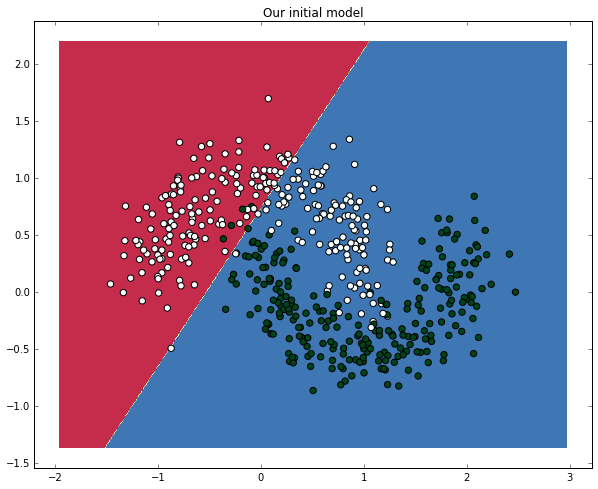

In [19]:
plot_decision_boundary(n)
plt.title("Our initial model")

**Exercise**: Create Neural networks with 10 hidden layers on the above code. What's the impact on accuracy?

error in interation 0 : 29.99613
Final training error: 26.63492
1 loops, best of 1: 234 ms per loop


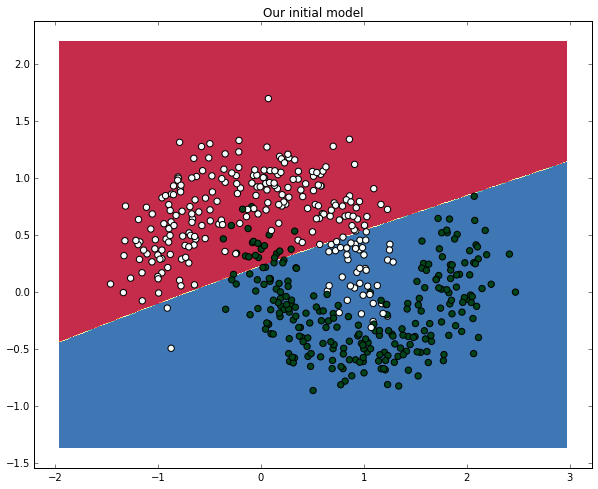

In [20]:
n = NN(2, 10, 1)
%timeit -n 1 -r 1 n.train(zip(X,y), iterations=2)
plot_decision_boundary(n)
plt.title("Our initial model")

**Exercise**: Train the neural networks by increasing the epochs. What's the impact on accuracy?

error in interation 0 : 31.78975
error in interation 5 : 26.60825
error in interation 10 : 27.44009
error in interation 15 : 26.69077
error in interation 20 : 27.21359
error in interation 25 : 26.49674
error in interation 30 : 25.83807
error in interation 35 : 30.26689
error in interation 40 : 29.72095
error in interation 45 : 28.71148
Final training error: 29.32234
1 loops, best of 1: 5.06 s per loop


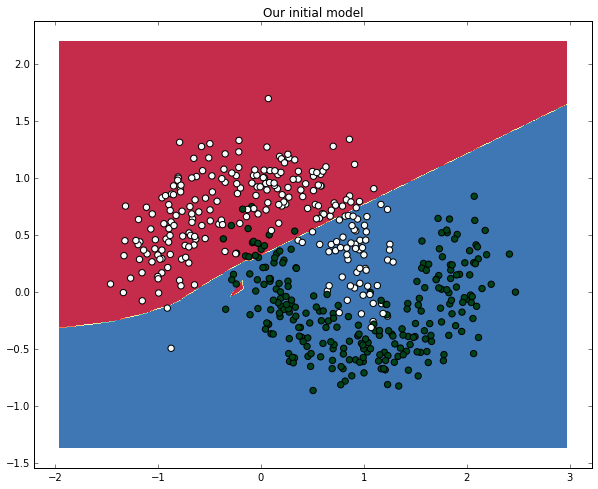

In [23]:
n = NN(2, 10, 1)
%timeit -n 1 -r 1 n.train(zip(X,y), iterations=50)
plot_decision_boundary(n)
plt.title("Our initial model")